In [27]:
from PIL import Image
import matplotlib.pyplot as plt
#import georasters as gr
%matplotlib inline

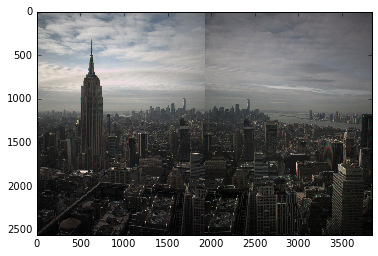

In [28]:
im = Image.open('example_day_images.png')
plt.imshow(im)

### GDAL Tutorial
http://www.gdal.org/gdal_tutorial.html

In [1]:
#Opening the File
import gdal
from gdalconst import *

dataset = gdal.Open('Poly_MN_bldg_Raster/Poly_MN_bldg_PolygonToRaster0.tif', GA_ReadOnly )
if dataset is None:
    print "Open failed"


In [2]:
#Getting Dataset Information
print 'Driver: ', dataset.GetDriver().ShortName,'/', \
      dataset.GetDriver().LongName
print 'Size is ',dataset.RasterXSize,'x',dataset.RasterYSize, \
      'x',dataset.RasterCount
print 'Projection is ',dataset.GetProjection()
geotransform = dataset.GetGeoTransform()
if not geotransform is None:
    print 'Origin = (',geotransform[0], ',',geotransform[3],')'
    print 'Pixel Size = (',geotransform[1], ',',geotransform[5],')'


Driver:  GTiff / GeoTIFF
Size is  2048 x 2048 x 1
Projection is  PROJCS["NAD_1983_StatePlane_New_York_Long_Island_FIPS_3104_Feet",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.2572221010042,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4269"]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["standard_parallel_1",40.66666666666666],PARAMETER["standard_parallel_2",41.03333333333333],PARAMETER["latitude_of_origin",40.16666666666666],PARAMETER["central_meridian",-74],PARAMETER["false_easting",984250.0000000002],PARAMETER["false_northing",0],UNIT["US survey foot",0.3048006096012192,AUTHORITY["EPSG","9003"]]]
Origin = ( 978979.241501 , 196527.07369 )
Pixel Size = ( 1.0 , -1.0 )


In [3]:
#Fetching a Raster Band
band = dataset.GetRasterBand(1)
print 'Band Type=',gdal.GetDataTypeName(band.DataType)
min = band.GetMinimum()
max = band.GetMaximum()
if min is None or max is None:
    (min,max) = band.ComputeRasterMinMax(1)
print 'Min=%.3f, Max=%.3f' % (min,max)
if band.GetOverviewCount() > 0:
    print 'Band has ', band.GetOverviewCount(), ' overviews.'
if not band.GetRasterColorTable() is None:
    print 'Band has a color table with ', \
    band.GetRasterColorTable().GetCount(), ' entries.'


Band Type= Float64
Min=-179769313486229994100682891303053148263627268423377803312421732791699473767707013363194982151154908054747719771310521883701314414818221444542456715764545533040329265559729229271763858732704880089275927461695259646152755047203268216825549013844516126079135752249260292543221745333646402418039172054416281829376.000, Max=677.948
Band has  4  overviews.


In [7]:
#Reading Raster Data

# This is what it does under the hood, but we can use directly the function ReadAsArray
# scanline = band.ReadRaster( 0, 0, band.XSize, 1, \
#                              band.XSize, 1, GDT_Float32 )
# import struct
# tuple_of_floats = struct.unpack('f' * band.XSize, scanline)

In [30]:
raster0 = dataset.ReadAsArray()

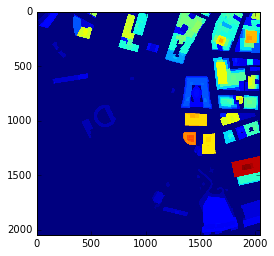

In [33]:
plt.imshow(img, vmin=0)
plt.show()